# Data prepration in python

# Data reading

In [7]:
import nltk
import pandas as pd
import numpy as np

In [8]:
SMS_data=pd.read_csv('Spam_data.csv',sep='\t',names=['label','text'])

In [3]:
SMS_data.head(n=5)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
SMS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label    5572 non-null object
text     5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [13]:
SMS_data['text_len']=SMS_data['text'].apply(len)

In [14]:
SMS_data.head()

,label,text,text_len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Data Visualizing

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1155de9b0>]],
      dtype=object)

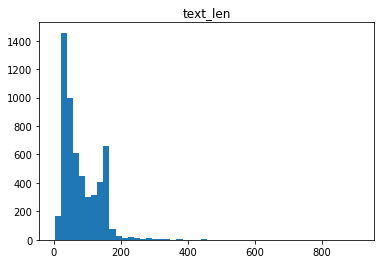

In [28]:
SMS_data.hist(column='text_len',bins=50,figsize=(6,4),grid=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x115284ef0>,
      dtype=object)

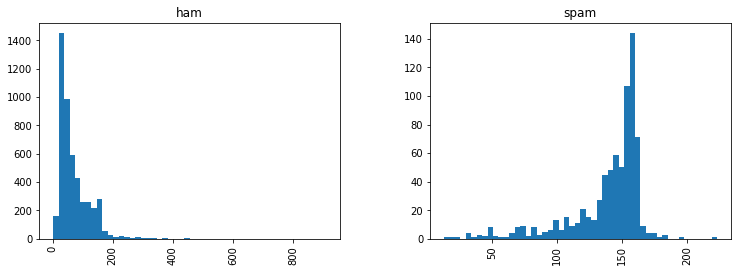

In [27]:
SMS_data.hist(column='text_len',by='label',bins=50,figsize=(12,4))

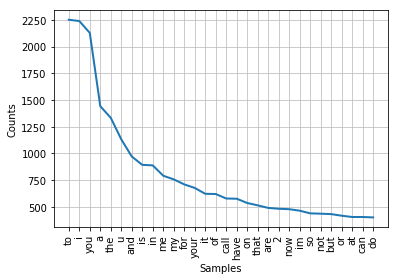

In [92]:
import string
from nltk.corpus import stopwords
txt = " ".join(SMS_data['text'])
translator = str.maketrans('', '', string.punctuation)
#string.punctuation--> !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
words=txt.translate(translator).lower().split()
fd = nltk.FreqDist(words)
fd.plot(30,cumulative=False)

In [77]:
fd.most_common(20)

[('to', 2251),
 ('i', 2239),
 ('you', 2128),
 ('a', 1442),
 ('the', 1333),
 ('u', 1132),
 ('and', 971),
 ('is', 893),
 ('in', 888),
 ('me', 791),
 ('my', 757),
 ('for', 710),
 ('your', 677),
 ('it', 622),
 ('of', 620),
 ('call', 578),
 ('have', 576),
 ('on', 536),
 ('that', 514),
 ('are', 490)]

# Data tokenizing

In [78]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/atousa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [94]:
import re
word_list=[]
i=0
for txt in SMS_data['text']:
     w_list = re.sub(r'[^a-z]',' ',txt.lower()).split()
     SMS_data.ix[i,'text1']=' '.join(w_list)
     w_list=[w for w in w_list if w not in stopwords.words('english')]
     word_list+=w_list
     i+=1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [80]:
len(word_list)

50321

# Classifier Algorithm

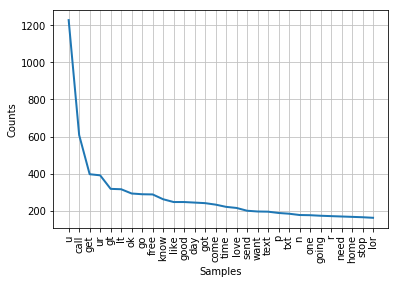

In [96]:
all_words=nltk.FreqDist(word_list)
all_words.plot(30,cumulative=False)

In [37]:
a=all_words.most_common()

In [97]:
word_common=all_words.most_common()[:3000]

In [98]:
word_features=[w[0] for w in word_common]

In [99]:
SMS_data.head(n=5)

,label,text,text_len,text1
0,ham,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup final ...
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah i don t think he goes to usf he lives arou...


In [100]:
def find_feature(document):
    features={}
    words=document.split()
    for w in word_common:
        features[w[0]]=(w[0] in words)
    return features

Feature_set=[]
for i, row in enumerate(SMS_data.values):
    label, text,text_len, text1=row
    Feature_set.append((find_feature(text1),label))  

In [101]:
train_set=Feature_set[:3000]
test_set=Feature_set[3000:]

In [105]:
classifier=nltk.NaiveBayesClassifier.train(train_set)

In [103]:
print("Naive bayes algorithm accuracy percent:",(nltk.classify.accuracy(classifier,test_set))*100)

Naive bayes algorithm accuracy percent: 98.25038880248833


What this tells you is the ratio of occurences in negative to positive, or visa versa, for every word. So here, we can see that the term "www" appears 238.1  more times as often in spam as it does in ham.

In [106]:
classifier.show_most_informative_features(3000)

Most Informative Features
                     www = True             spam : ham    =    238.1 : 1.0
                     box = True             spam : ham    =    166.5 : 1.0
                       p = True             spam : ham    =    135.6 : 1.0
                 service = True             spam : ham    =    128.5 : 1.0
                     txt = True             spam : ham    =     86.4 : 1.0
                landline = True             spam : ham    =     73.8 : 1.0
                     age = True             spam : ham    =     65.3 : 1.0
                    rate = True             spam : ham    =     65.3 : 1.0
                  mobile = True             spam : ham    =     62.6 : 1.0
                    code = True             spam : ham    =     61.1 : 1.0
                     win = True             spam : ham    =     59.7 : 1.0
                      po = True             spam : ham    =     56.9 : 1.0
                   video = True             spam : ham    =     48.5 : 1.0

                      er = False             ham : spam   =      1.0 : 1.0
                original = False             ham : spam   =      1.0 : 1.0
                    seem = False             ham : spam   =      1.0 : 1.0
                 running = False             ham : spam   =      1.0 : 1.0
                 pleased = False             ham : spam   =      1.0 : 1.0
                   cross = False             ham : spam   =      1.0 : 1.0
                      px = False             ham : spam   =      1.0 : 1.0
                   helen = False             ham : spam   =      1.0 : 1.0
                     fav = False             ham : spam   =      1.0 : 1.0
                contract = False             ham : spam   =      1.0 : 1.0
                     hol = False             ham : spam   =      1.0 : 1.0
                  unique = False             ham : spam   =      1.0 : 1.0
                     zoe = False             ham : spam   =      1.0 : 1.0
                  london 

                   fault = False            spam : ham    =      1.0 : 1.0
                    evng = False            spam : ham    =      1.0 : 1.0
               including = False            spam : ham    =      1.0 : 1.0
                     btw = False            spam : ham    =      1.0 : 1.0
                 anyways = False            spam : ham    =      1.0 : 1.0
                    wats = False            spam : ham    =      1.0 : 1.0
                    mite = False            spam : ham    =      1.0 : 1.0
                hospital = False            spam : ham    =      1.0 : 1.0
                      xy = False            spam : ham    =      1.0 : 1.0
                    list = False            spam : ham    =      1.0 : 1.0
                     tea = False            spam : ham    =      1.0 : 1.0
               character = False            spam : ham    =      1.0 : 1.0
              confidence = False            spam : ham    =      1.0 : 1.0
                 respect 

# Text blob

A sentence could be stating a fact( objective) or expressing an opinion( subjective). Determining this is a classification of a sentence as being objective or subjective
For sentences tagged as subjective in the classification step above, one could further classify those sentences as expressing a positive or negative sentiment - weeding out objective statements may help improve the performance of sentiment classification into positive and negative sentiment.
So in essence given a sentence - one could first use a classifier to label a sentence as subjective or objective and then do another classification to further classify subjective sentences as either positive or negative.

In [111]:
#textblob is on top of nltk but vader is just sentiment library
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# blob does text analytic which can be shown by directory
# such as noun phrase, np_counts, sentiment
analyzer = SentimentIntensityAnalyzer()

In [126]:
f=open("/Users/atousa/Desktop/McMaster/BDA-102/Week4-TextMining/positive_new.txt","rb")
txt_pos=f.read().decode('utf-8',errors='ignore')
f.close()
lines_pos=txt_pos.split('\n')

f=open("/Users/atousa/Desktop/McMaster/BDA-102/Week4-TextMining/negative_new.txt","rb")
txt_neg=f.read().decode('utf-8',errors='ignore')
f.close()
lines_neg=txt_neg.split('\n')

In [135]:
vs = analyzer.polarity_scores(lines_pos[0])

In [136]:
vs

{'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'compound': 0.3612}

In [139]:
pos_count = 0
pos_correct = 0

for line in lines_pos:
        vs = analyzer.polarity_scores(line)
        if vs['pos']>vs['neg']:
                pos_correct += 1
        pos_count +=1

In [140]:
neg_count = 0
neg_correct = 0

for line in lines_neg:
        vs = analyzer.polarity_scores(line)
        if vs['neg']>vs['pos']:
                neg_correct += 1
        neg_count +=1

In [141]:
print("Positive accuracy = {}% via {} samples".format(pos_correct/pos_count*100.0, pos_count))
print("Negative accuracy = {}% via {} samples".format(neg_correct/neg_count*100.0, neg_count))

Positive accuracy = 69.69810613163322% via 5333 samples
Negative accuracy = 40.052503281455095% via 5333 samples
